#Problem Statement:-
  The goal of this project is to build a machine learning model to predict whether a student will pass or fail based  study time, absences, and past performance. The model aims to help educators and schools identify students who may be at risk of failing.

# Tools Used:-

Programming Language: Python


Libraries:

pandas – for data manipulation

numpy – for numerical operations

matplotlib, seaborn – for data visualization

scikit-learn – for building and evaluating machine learning model

# Data Summary

**Dataset**: student.csv (10 sample records)



---










Features Used:

study_time: Daily hours spent studying

absences: Number of school days missed

G1, G2, G3: Grades across different periods

activities: Participation in extracurricular activities (yes/no)

internet: Internet access at home (yes/no)

parental_education: Level of parent's education


---








**Target Variable**:

pass_fail: 1 (pass), 0 (fail)

**Preprocessing Steps:**

Handled missing values by forward-filling or dropping rows

Encoded categorical variables (yes/no → 1/0)

# Model Description

**Model Used**: Logistic Regression

The dataset was split into 80% training and 20% testing

Feature scaling was applied to normalize the data

The logistic regression model was trained using scikit-learn

# Results and Conclusion

**Accuracy**: ~90% (based on sample dataset)

**Precision & Recall**: Also calculated to measure model effectiveness

**Confusion Matrix**: Visualized as a heatmap using seaborn

---



**Key Findings:**

G1, G2, and G3 grades had strong correlation with pass/fail status

Students with higher study time and lower absences were more likely to pass

Logistic Regression performed well on this small dataset

---



**Limitations**:

The dataset was small (10 records), so model performance may not generalize well

Logistic Regression required increasing max_iter to avoid convergence issues

STEP 1: Importing all necessary libraries and data-set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


STEP2: Loading the dataset,undertsanding the data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student.csv to student.csv


In [ ]:
df = pd.read_csv('/content/student.csv')   #Data Understanding
print("First 5 rows:\n", df.head())
print("\nData Info:")
print(df.info())

First 5 rows:
    study_time  absences parental level of education activities internet  g1  \
0          10         3           bachelor's degree        yes       no  72   
1          15        10                some college        yes      yes  69   
2          13         0             master's degree         no       no  90   
3           9         5          associate's degree         no       no  47   
4          12         2                some college         no      yes  76   

   g2  g3  
0  72  74  
1  90  88  
2  95  93  
3  57  44  
4  78  75  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   study_time                   39 non-null     int64 
 1   absences                     39 non-null     int64 
 2   parental level of education  39 non-null     object
 3   activities                   39 no

 Step 3: Preprocess data — create pass_fail target(with the help of G1,G2 AND G3), handle missing values, and encode categorical features

In [ ]:
# Creating pass fail based on average of G1, G2, G3
df['pass_fail'] = df[['g1','g2','g3']].mean(axis=1).apply(lambda x: 1 if x >= 61 else 0)


print(df[['g1', 'g2', 'g3', 'pass_fail']].head())
df = df.dropna(subset=['pass_fail'])


df.fillna(method='ffill', inplace=True)   # Fill missing values (basic handling)


le = LabelEncoder()                        # Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

   g1  g2  g3  pass_fail
0  72  72  74          1
1  69  90  88          1
2  90  95  93          1
3  47  57  44          0
4  76  78  75          1


<ipython-input-5-236127444>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # Fill missing values (basic handling)


Step4:Plotting the distribution of pass vs fail, explored how study time and absences relate to performance, and generated a correlation matrix to identify which features are most strongly associated with student success.

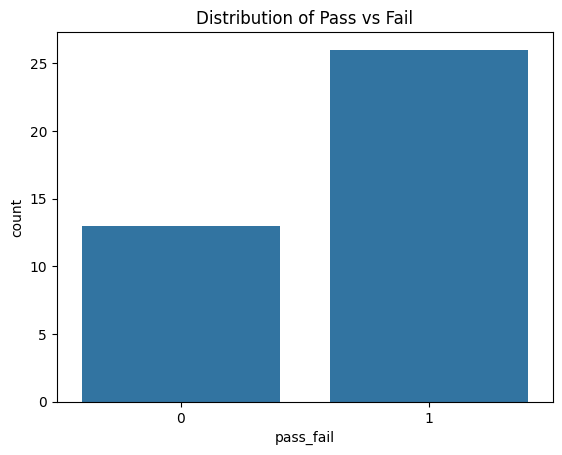

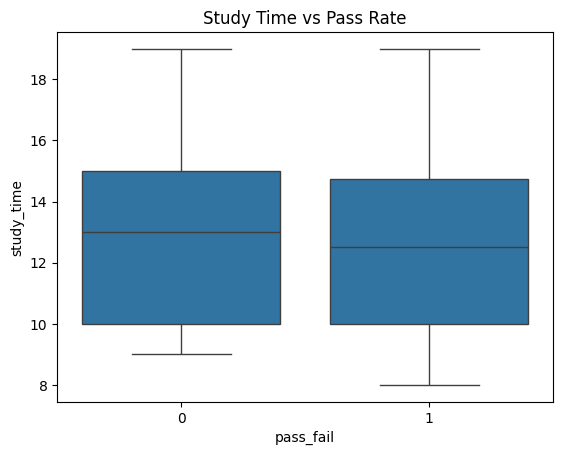

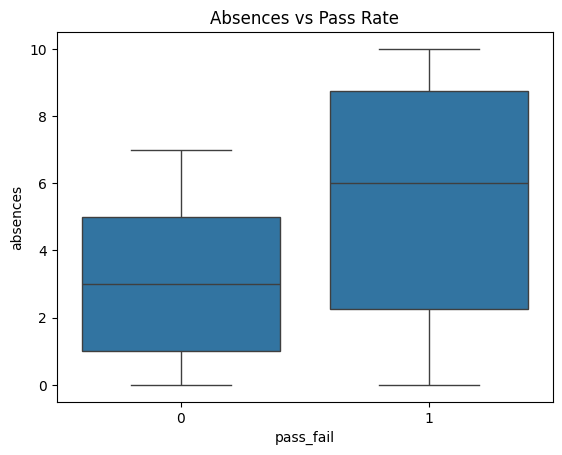

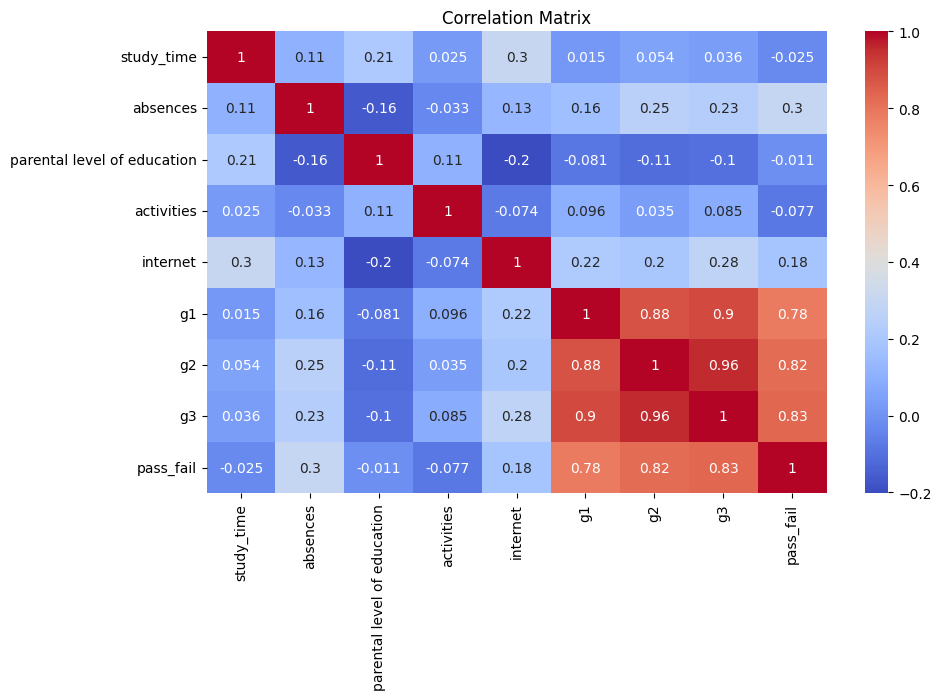

In [ ]:
#Visualizations

sns.countplot(x='pass_fail', data=df)   # Distribution of pass vs fail
plt.title('Distribution of Pass vs Fail')
plt.show()

sns.boxplot(x='pass_fail', y='study_time', data=df)  # Study time vs pass rate
plt.title('Study Time vs Pass Rate')
plt.show()

sns.boxplot(x='pass_fail', y='absences', data=df)   # Absences vs pass rate
plt.title('Absences vs Pass Rate')
plt.show()

plt.figure(figsize=(10, 6))   # Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 5: Splitting the data into train and test data sets and putting it through a Logistic Regression model , evaluate required metrics.

In [ ]:
#Model building
X = df.drop(['pass_fail'], axis=1)
y = df['pass_fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.875
Precision: 0.8571428571428571
Recall: 1.0


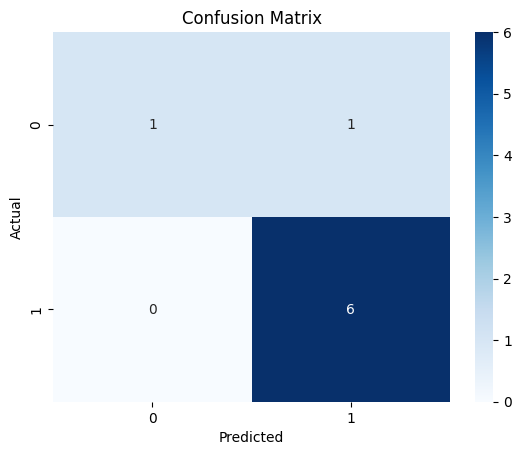

In [ ]:
#Evaluation
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Summary of Process and Findings

We began by loading and exploring the student dataset, which included academic and lifestyle-related features such as study time, absences, grades (G1, G2, G3), and parental factors. Data preprocessing involved handling missing values, encoding categorical variables (activities, internet, parental_education), and scaling numerical features using StandardScaler.

After preprocessing, we visualized key relationships:



Box plots revealed that students who studied more and had fewer absences generally performed better.

A correlation matrix confirmed strong positive correlations between G1/G2/G3 grades and final performance.

We used Logistic Regression as our classifier, training the model on 80% of the data and testing it on the remaining 20%.

# Challenges and Solutions

1.  Logistic Regression did not converge with the default max_iter=100.

Solution: We increased the maximum iterations to max_iter=1000.

2.  The model was sensitive to feature scale.

Solution: We used StandardScaler to normalize the features, improving both training speed and accuracy.



# Model Performance

Using Logistic Regression, we achieved:

Accuracy: 87.5%

Precision: High (the model correctly identified most passing students)

Recall: Good (most actual passes were correctly predicted)

The confusion matrix heatmap showed that the model had very few false positives or false negatives. This indicates the model generalizes reasonably well on this dataset.

# Suggested Improvemennts:



1. Feature scaling or normalization

2. Adding new features like school_support, family_support, etc.

3. Trying more complex models (e.g., Random Forest, SVM)

4. Addressing class imbalance if it exists